# Supervised Machine Learning - Regression

## This script contains:
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. Performance improvement after removing outliers

### 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# set graphs to display in the notebook automatically

%matplotlib inline

In [3]:
# define path

path = '/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis'

In [4]:
# Import data for analysis

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','EPA Daily Data with AQI Categories.pkl'))

### 02. Data cleaning

In [5]:
# review dataframe output

df.columns

Index(['Unnamed: 0', 'Site Num', 'Latitude', 'Longitude',
       'Sample Duration Ozone', 'Pollutant Standard Ozone', 'Date Local',
       'Units of Measure Ozone', 'Event Type Ozone', 'Observation Count Ozone',
       'Observation Percent Ozone', 'Arithmetic Mean Ozone',
       '1st Max Value Ozone', '1st Max Hour Ozone', 'AQI Ozone',
       'Method Code Ozone', 'Method Name Ozone', 'Local Site Name', 'Address',
       'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Sample Duration CO', 'Pollutant Standard CO', 'Units of Measure CO',
       'Event Type CO', 'Observation Count CO', 'Observation Percent CO',
       'Arithmetic Mean CO', '1st Max Value CO', '1st Max Hour CO', 'AQI CO',
       'Method Code CO', 'Method Name CO', 'Sample Duration NO2',
       'Pollutant Standard NO2', 'Units of Measure NO2', 'Event Type NO2',
       'Observation Count NO2', 'Observation Percent NO2',
       'Arithmetic Mean NO2', '1st Max Value NO2', '1st Max Hour NO2',
       'AQI NO2', 'Me

In [6]:
df.head()

,Unnamed: 0,Site Num,Latitude,Longitude,Sample Duration Ozone,Pollutant Standard Ozone,Date Local,Units of Measure Ozone,Event Type Ozone,Observation Count Ozone,...,Observation Count SO2,Observation Percent SO2,Arithmetic Mean SO2,1st Max Value SO2,1st Max Hour SO2,AQI SO2,Method Code SO2,Method Name SO2,_merge,AQI Level Ozone
0,0,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-02-28,Parts per million,None,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
1,1,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-01,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
2,2,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-02,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Moderate
3,3,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-03,Parts per million,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
4,4,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-04,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Moderate


In [7]:
df.shape

(472410, 61)

In [8]:
# rename long column names for analysis

df.rename(columns = {'Arithmetic Mean Ozone':'Mean Ozone',
                     'Arithmetic Mean CO':'Mean CO',
                     'Arithmetic Mean NO2':'Mean NO2',
                     'Arithmetic Mean SO2':'Mean SO2'},
          inplace = True)

In [9]:
# select the necessary columns for analysis

columns = ['Mean Ozone','Mean NO2']

In [10]:
# create a subset of the data using those columns

df_sub = df[columns]

In [11]:
df_sub.shape

(472410, 2)

#### Missing values

In [12]:
# check for missing values

df_sub.isnull().sum()

Mean Ozone    130909
Mean NO2      280482
dtype: int64

In [13]:
# drop NaN values from the subset

df_sub = df_sub.dropna(subset=['Mean Ozone'])

In [14]:
# recheck for missing values

df_sub.isnull().sum()

Mean Ozone         0
Mean NO2      200902
dtype: int64

In [15]:
# drop NaN values from the subset

df_sub = df_sub.dropna(subset=['Mean NO2'])

In [16]:
# recheck for missing values

df_sub.isnull().sum()

Mean Ozone    0
Mean NO2      0
dtype: int64

#### Duplicates check

In [17]:
# check for duplicates

dups = df_sub.duplicated()

In [18]:
dups.shape # no dups

(140599,)

#### Extreme values check

/var/folders/d6/4mhjj43j7r9_r1lf0ncld46h0000gn/T/ipykernel_51570/1013344602.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['Mean Ozone'], bins=25)


<Axes: xlabel='Mean Ozone', ylabel='Density'>

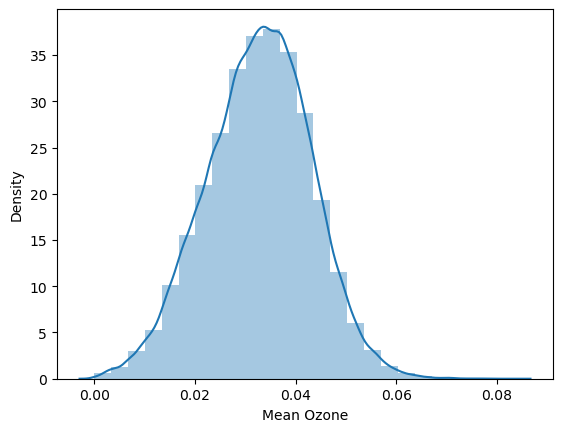

In [19]:
# create histrogram to show extreme values

sns.distplot(df_sub['Mean Ozone'], bins=25)

In [20]:
# check the mean

df_sub['Mean Ozone'].mean()

0.032700416930419134

In [21]:
# check the median

df_sub['Mean Ozone'].median()

0.033071

In [22]:
# check the max

df_sub['Mean Ozone'].max()

0.083765

/var/folders/d6/4mhjj43j7r9_r1lf0ncld46h0000gn/T/ipykernel_51570/3768939050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['Mean NO2'], bins=25)


<Axes: xlabel='Mean NO2', ylabel='Density'>

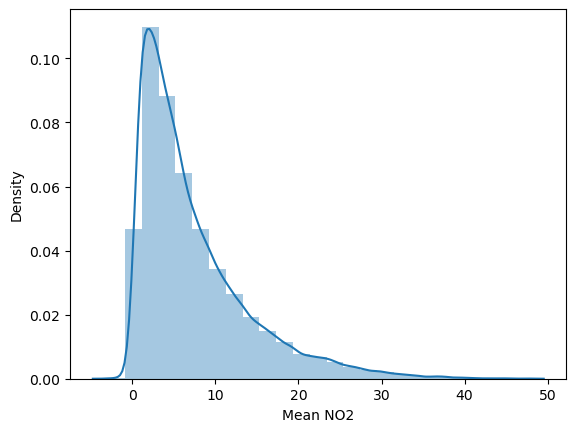

In [23]:
# create histrogram to show extreme values

sns.distplot(df_sub['Mean NO2'], bins=25)

In [24]:
# check the mean

df_sub['Mean NO2'].mean()

7.339073831563523

In [26]:
# check the median

df_sub['Mean NO2'].median()

5.266667

In [27]:
# check the max

df_sub['Mean NO2'].max()

47.658333

### 03. Data prep for regression analysis

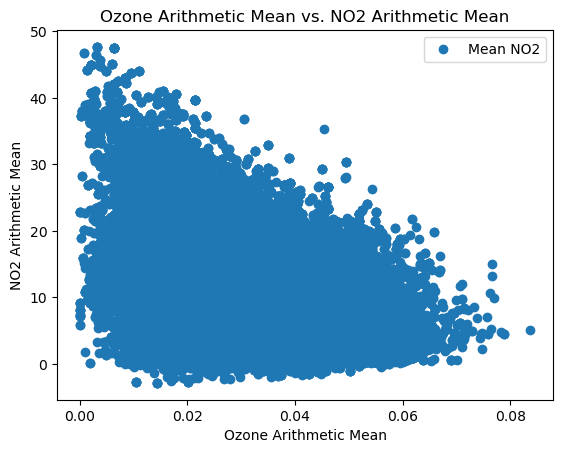

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_sub.plot(x = 'Mean Ozone', y='Mean NO2',style='o')
plt.title('Ozone Arithmetic Mean vs. NO2 Arithmetic Mean')  
plt.xlabel('Ozone Arithmetic Mean')  
plt.ylabel('NO2 Arithmetic Mean')  
plt.show()

#### Hypothesis

The higher the Ozone arithmetic mean value, the lower the NO2 arithmetic mean.

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sub['Mean Ozone'].values.reshape(-1,1)
y = df_sub['Mean NO2'].values.reshape(-1,1)

In [30]:
X

array([[0.024765],
       [0.024765],
       [0.024765],
       ...,
       [0.040235],
       [0.045   ],
       [0.045   ]])

In [31]:
y

array([[1.308333],
       [1.308333],
       [1.308333],
       ...,
       [1.170833],
       [1.122727],
       [1.122727]])

In [32]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 04. Regression analysis

In [33]:
# Create a regression object

regression = LinearRegression()

In [34]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

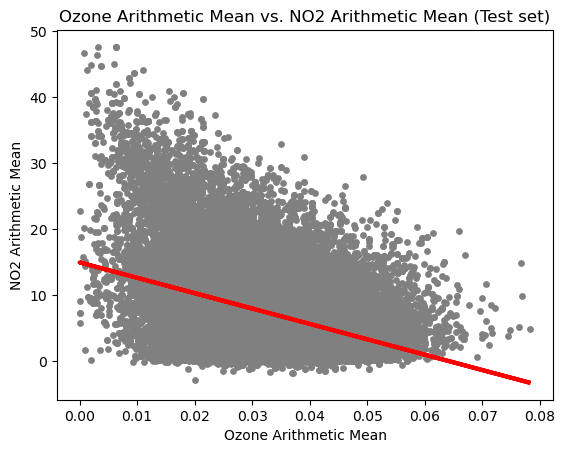

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ozone Arithmetic Mean vs. NO2 Arithmetic Mean (Test set)')
plot_test.xlabel('Ozone Arithmetic Mean')
plot_test.ylabel('NO2 Arithmetic Mean')
plot_test.show()

#### Discussion

The line does not appear to fit the data very well. Especially when the mean is above 0.02, there are many, many data points scatter very far from the line.

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [38]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-233.1850724]]
Mean squared error:  38.10957806472351
R2 score:  0.12975548042587437


In [39]:
y_predicted

array([[11.39408907],
       [10.83164668],
       [ 7.11444344],
       ...,
       [ 5.45486528],
       [ 7.42994284],
       [ 8.00614315]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.550000,11.394089
1,10.217391,10.831647
2,15.152174,7.114443
3,2.304348,10.241922
4,9.782609,7.388902
5,10.073913,6.209219
6,3.817391,9.226867
7,4.178261,5.564462
8,0.434783,5.235205
9,2.566667,6.085864


#### Compare how the regression fits the training set

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-233.1850724]]
Mean squared error:  38.381857231479884
R2 score:  0.1316819621691354


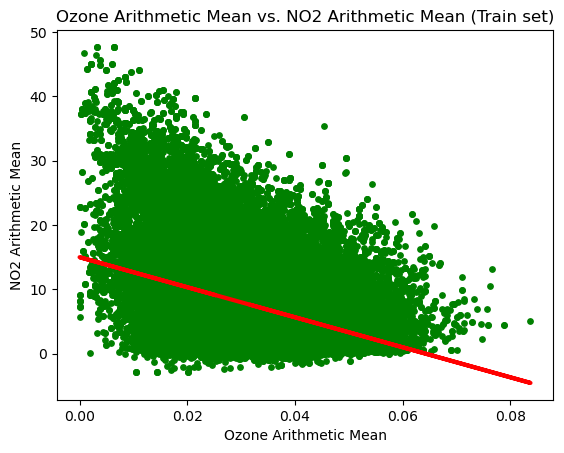

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Ozone Arithmetic Mean vs. NO2 Arithmetic Mean (Train set)')
plot_test.xlabel('Ozone Arithmetic Mean')
plot_test.ylabel('NO2 Arithmetic Mean')
plot_test.show()

#### Discussion

The high MSE value on the test set regression indicates that the data is far from the regression line, and the line is not very accurate. In addition, the R2 value of 0.1298 is very low and also indicates that the model is not the best fit for the data. Finally, when comparing the actual y values to the predicted y values, we can see there is quite a difference between the values. Overall, based on all of this information, this model did not perform very well.

### 5. Performance improvement after removing outliers

In [45]:
# Clean the extreme values from the "Mean NO2" variable observed during the consistency checks.

df_test = df_sub[df_sub['Mean NO2'] <=40] 

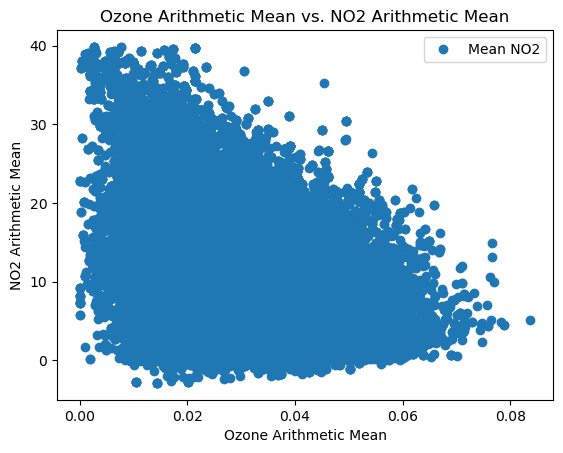

In [46]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Mean Ozone', y='Mean NO2', style='o')  
plt.title('Ozone Arithmetic Mean vs. NO2 Arithmetic Mean')  
plt.xlabel('Ozone Arithmetic Mean')  
plt.ylabel('NO2 Arithmetic Mean')  
plt.show()

In [47]:
X_2 = df_test['Mean Ozone'].values.reshape(-1,1)
y_2 = df_test['Mean NO2'].values.reshape(-1,1)

In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [49]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [50]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [51]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-229.47082741]]
Mean squared error:  36.892746255099155
R2 score:  0.11842081463275755


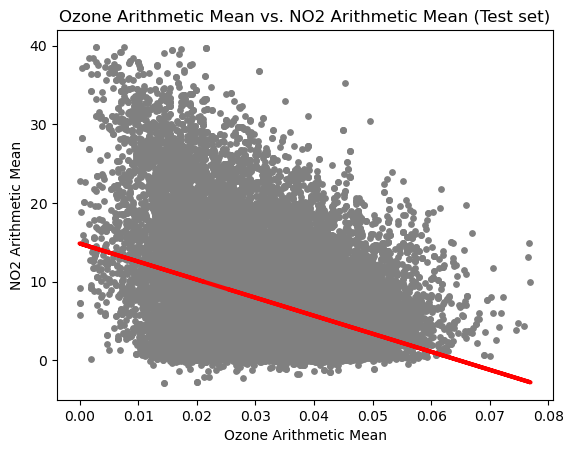

In [53]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Ozone Arithmetic Mean vs. NO2 Arithmetic Mean (Test set)')
plot_test.xlabel('Ozone Arithmetic Mean')
plot_test.ylabel('NO2 Arithmetic Mean')
plot_test.show()

In [54]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3.839130,8.967713
1,18.541667,4.850777
2,2.520000,5.936404
3,1.891667,2.906930
4,3.566667,5.404261
5,1.134783,8.670778
6,2.673913,9.008100
7,9.333333,6.024980
8,39.166667,13.233117
9,18.291667,11.653899


#### Discussion

Removing the outliers did not improve the performance or fit of the model, and the values removed may not be true outliers. Overall, this did not change the performance of the model. This linear regression is not the best fit for this data